In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.cluster import KMeans

#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Read Data from CSV

In [3]:
data = pd.read_csv('Poverty.csv')

In [4]:
data.head()

,Country or Area,Year,Value,Value Footnotes
0,Albania,2012,1.1,1.0
1,Albania,2008,0.4,1.0
2,Albania,2005,1.1,1.0
3,Albania,2002,2.0,1.0
4,Albania,1996,1.1,1.0


#### lets drop extra column Value Footnotes

In [5]:
# Read data from csv and print the head
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Albania,2012,1.1
1,Albania,2008,0.4
2,Albania,2005,1.1
3,Albania,2002,2.0
4,Albania,1996,1.1


#### Get data insights

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
Country or Area    1614 non-null object
Year               1614 non-null object
Value              1602 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.9+ KB


#### it seems column Value has some missing values or NaN 

In [7]:
vals = data['Value']

In [8]:
d = data[ vals.isna() ]
d

,Country or Area,Year,Value
1602,footnoteSeqID,Footnote,NaN
1603,1,Estimated from unit-record consumption data.,NaN
1604,2,Estimated from grouped consumption data.,NaN
1605,3,Estimated from unit-record income data. Urban ...,NaN
1606,4,Estimated from grouped income data. Urban only...,NaN
1607,5,Estimated from unit-record income data.,NaN
1608,6,Estimated from grouped income data.,NaN
1609,7,Estimated from grouped consumption data. Natio...,NaN
1610,8,"Retrieved on Sept 19, 2018 from World Bank, Po...",NaN
1611,9,Estimated from unit-record consumption data. P...,NaN


##### lets drop this entries

In [9]:
data  = data [0:1602] 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 3 columns):
Country or Area    1602 non-null object
Year               1602 non-null object
Value              1602 non-null float64
dtypes: float64(1), object(2)
memory usage: 37.6+ KB


In [11]:
data['Country or Area'].nunique()

175

### Lets normalize data

In [12]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [13]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Albania,2012,0.011690
1,Albania,2008,0.004251
2,Albania,2005,0.011690
3,Albania,2002,0.021254
4,Albania,1996,0.011690


#### Using tsfresh to extract features from data

In [14]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:18<00:00,  1.28s/it]


In [15]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,NaN,NaN,NaN,NaN,NaN,...,-0.000002,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0
Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,NaN,NaN,NaN,NaN,NaN,...,-0.000297,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0
Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0
Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,0.063809,NaN,...,0.000003,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0
Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,0.000000,NaN,...,-0.000626,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0


In [16]:
#Check shape of new data with extracted features
extracted_features.shape

(175, 794)

In [17]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

568

In [18]:
# it seems 568 columns out of 794 have some null values

In [19]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [20]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [21]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [22]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [23]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,1
1,Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0,1
2,Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,0.103082,-1.000000,-0.056323,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0,1
3,Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,0.063809,...,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0,1
4,Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,0.000000,...,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0,1


In [24]:
#data_after_impute.to_csv('Poverty-output.csv')

In [25]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

             precision    recall  f1-score   support

          0       0.19      1.00      0.32        33
          1       1.00      0.01      0.01       142

avg / total       0.85      0.19      0.07       175



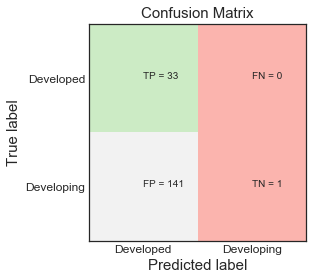

In [26]:
model = KMeans(n_clusters=2,n_init=400,random_state=42,max_iter=1000)
model.fit(X)
y_pred = model.labels_
y_arr = np.array(y)
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

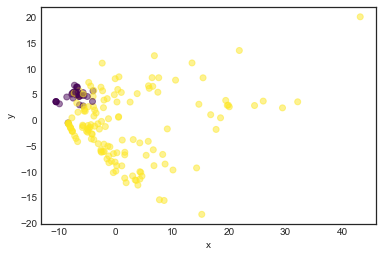

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(scaled_df)  
df = pd.DataFrame(X_pca)
df.head()
a = df[0]
b = df [1]
plt.scatter(a,b,alpha=0.5,c=y,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

             precision    recall  f1-score   support

          0       0.23      1.00      0.37        33
          1       1.00      0.21      0.35       142

avg / total       0.85      0.36      0.35       175



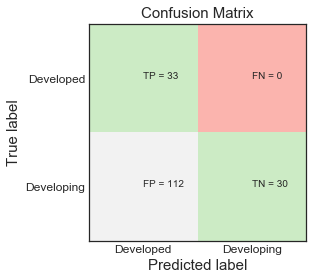

In [28]:
model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
model.fit(X_pca)
y_pred = model.labels_
accuracy_score(y_arr,y_pred)
print(classification_report(y_arr,y_pred))
plotConfusion(confusion_matrix(y_arr,y_pred))

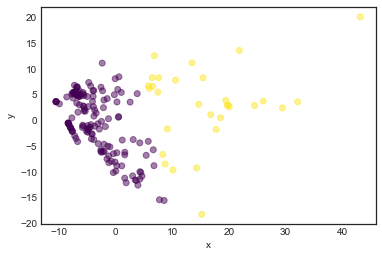

In [31]:
plt.scatter(a,b,alpha=0.5,c=y_pred,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
def testFunctions(dimensions,scaled_df,y_arr):
    pca = PCA(n_components=dimensions)  
    X_pca = pca.fit_transform(scaled_df)
    model = KMeans(n_clusters=2,n_init=100,random_state=42,precompute_distances=True,max_iter=1000)
    model.fit(X_pca)
    y_pred = model.labels_
    score = f1_score(y_pred,y_arr,average='weighted')
    return score

[0.38799432602934036, 0.3670237784165142, 0.3369180715764567, 0.33916094412548314, 0.33916094412548314, 0.3369180715764567, 0.3439586377430594, 0.3670237784165142, 0.6466898954703832, 0.3670237784165142, 0.3670237784165142, 0.3670237784165142, 0.3415084806928907, 0.3415084806928907, 0.3415084806928907]


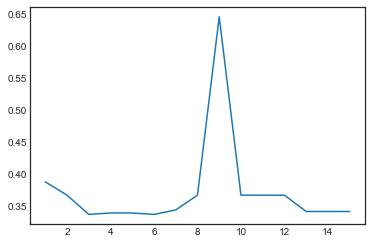

In [30]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df)

dimensions_ = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []
for dim in dimensions_:
    scores.append(testFunctions(dim,scaled_df,y_arr))

plt.plot(dimensions_,scores)    
print(scores)